# Proyecto Final: Análisis de Big Data con Spark y HDFS
## Visión general:
Este proyecto está diseñado para ayudarte a adquirir experiencia práctica con Spark y HD
Trabajarás con tu propio conjunto de datos y utilizarás Spark para analizar los datos, obte
información y generar resultados en diferentes formatos de salida y fuentes. También util
Spark Structured Streaming para realizar análisis en tiempo real de los datos utilizando
## Entorno:
Ejecutarás este proyecto en tu propia computadora personal utilizando un entorno con
contenedores Docker que contienen Spark 3 y HDFS Py

## Integrantes del equipo:
* Alejandra Elizabeth Trujillo Navarro
* Carla Georgina Sanchez Arreguin
* Jessica Montserrat Morales Enrique
* Sofia Daniela Rodriguez Saenz

# 1. Proyecto: IT Salary Survey for EU region
**Dataset:** https://www.kaggle.com/datasets/parulpandey/2020-it-salary-survey-for-eu-region
<br/>
<br/>
<div style="text-align: center;">
    <img src="images/img212.png" width="400" height="400" alt="image">
    <img src="images/img213.png" width="339" height="339" alt="image">
</div>

## 1.1 Objetivos general:
Analizar las tendencias y dinámicas laborales en el sector tecnológico a lo largo del tiempo y en función de diversos factores demográficos, económicos y empresariales, con el fin de proporcionar una visión integral de los cambios en la utilización de tecnologías, estructuras salariales, y decisiones empresariales durante y después de la pandemia de COVID-19


## 1.2 Objetivos Específicos del Proyecto

### 1.2.1. Análisis de lenguajes de programación por grupo de edad

- **Objetivo:** Determinar los lenguajes de programación más utilizados por las siguientes franjas etarias:
  - 18 a 30 años
  - 31 a 40 años
  - Mayores de 41 años

### 1.2.2. Examinación de estructuras salariales en el sector tecnológico
- **Objetivo:** Compilar un listado de salarios, ordenados de mayor a menor, especificando el puesto y la ciudad de trabajo.

### 1.2.3. Identificación de empresas con despidos durante la pandemia de COVID-19
- **Objetivo:** Listar las empresas que realizaron despidos durante la pandemia y analizar las diferencias salariales entre géneros durante este periodo.

### 1.2.4. Investigación de lenguajes de programación predominantes
- **Objetivo:** Establecer cuáles son los lenguajes de programación más utilizados en la actualidad dentro del sector tecnológico.

### 1.2.5. Estudio de diferencias en empleo y salarios por género
- **Objetivo:** Comparar las diferencia salariales en trabajadores en los diferentes géneros.

### 1.2.6. Diferencias salariales entre diferentes niveles de antigüedad
- **Objetivo:** Comparar las diferencia salariales en trabajadores con nivel senior y junior, etc.

### 1.2.7. Comparación de salarios anuales de desarrolladores de Python (2018 vs. 2020)
- **Objetivo:** Analizar cómo han evolucionado los salarios anuales de los desarrolladores de Python desde 2018 hasta 2020.

### 1.2.8. Evaluación de la evolución de los lenguajes de programación más utilizados (2018-2020)
- **Objetivo:** Identificar los cinco lenguajes de programación más populares en los años 2018, 2019 y 2020 y examinar las tendencias y cambios a lo largo de estos años.


# 2. Etapa 1: 1. Conceptos básicos estructurados de PySpark con DataFrames
En esta etapa, se concentrará en cargar los datos en HDFS y usar Spark DataFrames para realizar operaciones básicas como crear esquemas, seleccionar columnas, filtrar y ordenar filas y limpieza de valores nulos.

<div style="text-align: center;">
    <img src="images/grafica.png" width="300" height="300" alt="image">
</div>

### 1.1 Importar modulos

In [1]:
# Importamos módulos para la carga,manejo, grafica de datos
import pyspark.sql.functions as f 
import pyspark.sql.types as t
import matplotlib.pyplot as plt

In [2]:
# Importamos módulos para la carga y manejo de datos
import pyspark.sql.functions as f 
import pyspark.sql.types as t

In [559]:
# Creamos sesión de Spark
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("IT_Salary") \
    .getOrCreate()

## 1.2 Cargar datos

In [4]:
# Cargamos los datos de 2018
datasets_path = 'data/'
dataset2018_path=f'{datasets_path}/IT Salary Survey EU 2018.csv'
salaries2018 = spark.read.format('csv').option('header', True).load(dataset2018_path)

In [5]:
salaries2018 = salaries2018.withColumnRenamed('Years of experience', 'YearsExperience'
).withColumnRenamed('Your level', 'Level'  
).withColumnRenamed('Current Salary', 'Salary' 
).withColumnRenamed('Salary one year ago' , 'SalaryOneYear'
).withColumnRenamed('Salary two years ago', 'SalaryTwoYears'
).withColumnRenamed('Are you getting any Stock Options?', 'StockOptions'
).withColumnRenamed('Main language at work', 'MainLanguage' 
).withColumnRenamed('Company size', 'CompanySize' 
).withColumnRenamed('Company type', 'CompanyType' 
)

In [6]:
salaries2018.show(truncate=True, vertical = True)

-RECORD 0-------------------------------
 Timestamp       | 14/12/2018 12:41:33  
 Age             | 43                   
 Gender          | M                    
 City            | München              
 Position        | QA Ingenieur         
 YearsExperience | 11                   
 Level           | Senior               
 Salary          | 77000                
 SalaryOneYear   | 76200                
 SalaryTwoYears  | 68000                
 StockOptions    | No                   
 MainLanguage    | Deutsch              
 CompanySize     | 100-1000             
 CompanyType     | Product              
-RECORD 1-------------------------------
 Timestamp       | 14/12/2018 12:42:09  
 Age             | 33                   
 Gender          | F                    
 City            | München              
 Position        | Senior PHP Magent... 
 YearsExperience | 8                    
 Level           | Senior               
 Salary          | 65000                
 SalaryOneYear  

In [562]:
# Cargamos los datos de 2019
dataset2019_path=f'{datasets_path}/IT Salary Survey EU 2019.csv'
salaries2019 = spark.read.format('csv').option('header', True).load(dataset2019_path)

In [563]:
salaries2019 = salaries2019.withColumnRenamed('Zeitstempel', 'Timestamp'
).withColumnRenamed('Seniority Level', 'SeniorityLevel' 
).withColumnRenamed('Position (without seniority)' , 'Position'
).withColumnRenamed('Years of experience', 'YearsExperience '
).withColumnRenamed('Your main technology / programming language', 'ProgrammingLanguage'
).withColumnRenamed('Yearly brutto salary (without bonus and stocks)', 'Salary'
).withColumnRenamed('Yearly bonus', 'Bonus'
).withColumnRenamed('Yearly stocks','Stocks'                   
).withColumnRenamed('Yearly brutto salary (without bonus and stocks) one year ago. Only answer if staying in same country', 'SalaryOneYear'
).withColumnRenamed('Yearly bonus one year ago. Only answer if staying in same country', 'BonusOneYear'
).withColumnRenamed('Yearly stocks one year ago. Only answer if staying in same country', 'StocksOneYear' 
).withColumnRenamed('Number of vacation days', 'VacationDays' 
).withColumnRenamed('Number of home office days per month', 'DaysHomeOffice'
).withColumnRenamed('Main language at work', 'MainLanguage'  
).withColumnRenamed('Company name ', 'CompanyName'
).withColumnRenamed('Company size', 'CompanySize' 
).withColumnRenamed('Company type', 'CompanyType'
).withColumnRenamed('Сontract duration', 'СontractDuration'
).withColumnRenamed('Company business sector', 'BusinessSector'                    
)

In [564]:
salaries2019.show(truncate=False, vertical = True)

-RECORD 0-------------------------------------------------------------
 Timestamp           | 02.12.2019 11:18:26                            
 Age                 | 33                                             
 Gender              | Male                                           
 City                | Berlin                                         
 SeniorityLevel      | Senior                                         
 Position            | Fullstack Developer                            
 YearsExperience     | 13                                             
 ProgrammingLanguage | PHP                                            
 Salary              | 64000                                          
 Bonus               | 1000                                           
 Stocks              | NULL                                           
 SalaryOneYear       | 58000                                          
 BonusOneYear        | 1000                                           
 Stock

In [10]:
# Cargamos los datos de 2020
datasets_path = 'data/'
dataset2020_path=f'{datasets_path}/IT Salary Survey EU 2020.csv'
salaries2020 = spark.read.format('csv').option('header', True).load(dataset2020_path)

In [11]:
salaries2020 = salaries2020.withColumnRenamed('Total years of experience', 'YearsExperience'
).withColumnRenamed('Years of experience in Germany', 'ExperienceGermany' 
).withColumnRenamed('Seniority level' , 'SeniorityLevel'
).withColumnRenamed('Years of experience', 'YearsExperience '
).withColumnRenamed('Your main technology / programming language', 'ProgrammingLanguage'
).withColumnRenamed('Other technologies/programming languages you use often', 'OtherTech'
).withColumnRenamed('Yearly brutto salary (without bonus and stocks) in EUR', 'SalaryYear'
).withColumnRenamed('Yearly bonus + stocks in EUR','BonusYear'                   
).withColumnRenamed('Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country', 'AnnualSalary'
).withColumnRenamed('Annual bonus+stocks one year ago. Only answer if staying in same country', 'AnnualBonus'
).withColumnRenamed('Number of vacation days', 'VacationDays'  
).withColumnRenamed('Employment status', 'EmploymentStatus'
).withColumnRenamed('Сontract duration', 'СontractDuration'  
).withColumnRenamed('Main language at work', 'MainLanguage'
).withColumnRenamed('Company size', 'CompanySize' 
).withColumnRenamed('Company type', 'CompanyType'
).withColumnRenamed('Have you lost your job due to the coronavirus outbreak?', 'LostJobCoronavirus'
).withColumnRenamed('Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week', 'ShorterWorkingWeek'                    
).withColumnRenamed('Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR', 'PayWorkHome'                    
)

In [12]:
salaries2020.show(truncate=False, vertical = True)

-RECORD 0-------------------------------------------------------------------------------------
 Timestamp           | 24/11/2020 11:14:15                                                    
 Age                 | 26                                                                     
 Gender              | Male                                                                   
 City                | Munich                                                                 
 Position            | Software Engineer                                                      
 YearsExperience     | 5                                                                      
 ExperienceGermany   | 3                                                                      
 SeniorityLevel      | Senior                                                                 
 ProgrammingLanguage | TypeScript                                                             
 OtherTech           | Kotlin, Javascript / Typesc

### 1.3 Crear esquemas de cada dataset

In [13]:
salaries2018.printSchema()

root
 |-- Timestamp: string (nullable = true)
 |-- Age: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- City: string (nullable = true)
 |-- Position: string (nullable = true)
 |-- YearsExperience: string (nullable = true)
 |-- Level: string (nullable = true)
 |-- Salary: string (nullable = true)
 |-- SalaryOneYear: string (nullable = true)
 |-- SalaryTwoYears: string (nullable = true)
 |-- StockOptions: string (nullable = true)
 |-- MainLanguage: string (nullable = true)
 |-- CompanySize: string (nullable = true)
 |-- CompanyType: string (nullable = true)



In [565]:
salaries2019.printSchema()

root
 |-- Timestamp: string (nullable = true)
 |-- Age: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- City: string (nullable = true)
 |-- SeniorityLevel: string (nullable = true)
 |-- Position: string (nullable = true)
 |-- YearsExperience : string (nullable = true)
 |-- ProgrammingLanguage: string (nullable = true)
 |-- Salary: string (nullable = true)
 |-- Bonus: string (nullable = true)
 |-- Stocks: string (nullable = true)
 |-- SalaryOneYear: string (nullable = true)
 |-- BonusOneYear: string (nullable = true)
 |-- StocksOneYear: string (nullable = true)
 |-- VacationDays: string (nullable = true)
 |-- DaysHomeOffice: string (nullable = true)
 |-- MainLanguage: string (nullable = true)
 |-- CompanyName: string (nullable = true)
 |-- CompanySize: string (nullable = true)
 |-- CompanyType: string (nullable = true)
 |-- СontractDuration: string (nullable = true)
 |-- BusinessSector: string (nullable = true)
 |-- 0: string (nullable = true)



In [15]:
salaries2020.printSchema()

root
 |-- Timestamp: string (nullable = true)
 |-- Age: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- City: string (nullable = true)
 |-- Position : string (nullable = true)
 |-- YearsExperience: string (nullable = true)
 |-- ExperienceGermany: string (nullable = true)
 |-- SeniorityLevel: string (nullable = true)
 |-- ProgrammingLanguage: string (nullable = true)
 |-- OtherTech: string (nullable = true)
 |-- SalaryYear: string (nullable = true)
 |-- BonusYear: string (nullable = true)
 |-- AnnualSalary: string (nullable = true)
 |-- AnnualBonus: string (nullable = true)
 |-- VacationDays: string (nullable = true)
 |-- EmploymentStatus: string (nullable = true)
 |-- СontractDuration: string (nullable = true)
 |-- MainLanguage: string (nullable = true)
 |-- CompanySize: string (nullable = true)
 |-- CompanyType: string (nullable = true)
 |-- LostJobCoronavirus: string (nullable = true)
 |-- ShorterWorkingWeek: string (nullable = true)
 |-- PayWorkHome: string (null

### 1.3 Eliminar valores nulos

In [560]:
salaries2018 = salaries2018.dropna()
salaries2018.count()

368

In [566]:
salaries2019 = salaries2019.dropna()
salaries2019.count()

0

In [567]:
salaries2020 = salaries2020.dropna()
salaries2020.count()

144

# 2. Etapa 2: Análisis de datos con PySpark Estructurado
En esta etapa, utilizarás Spark DataFrames para realizar análisis de datos y obtener información.
Utilizarás agregaciones y estadísticas de dataframe para responder preguntas sobre los datos.
También puedes utilizar visualizaciones para mostrar tus resultados

<div style="text-align: center;">
    <img src="images/analysis.png" width="500" height="200" alt="image">
</div>

## 2.1. Investigación de lenguajes de programación predominantes
En esta sección, realizaremos un análisis de los lenguajes de programación más utilizados en el año 2020 en la empresas alemanas.

In [22]:
### Verificamos estructura de los salarios
salaries2020.printSchema()

root
 |-- Timestamp: string (nullable = true)
 |-- Age: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- City: string (nullable = true)
 |-- Position : string (nullable = true)
 |-- YearsExperience: string (nullable = true)
 |-- ExperienceGermany: string (nullable = true)
 |-- SeniorityLevel: string (nullable = true)
 |-- ProgrammingLanguage: string (nullable = true)
 |-- OtherTech: string (nullable = true)
 |-- SalaryYear: string (nullable = true)
 |-- BonusYear: string (nullable = true)
 |-- AnnualSalary: string (nullable = true)
 |-- AnnualBonus: string (nullable = true)
 |-- VacationDays: string (nullable = true)
 |-- EmploymentStatus: string (nullable = true)
 |-- СontractDuration: string (nullable = true)
 |-- MainLanguage: string (nullable = true)
 |-- CompanySize: string (nullable = true)
 |-- CompanyType: string (nullable = true)
 |-- LostJobCoronavirus: string (nullable = true)
 |-- ShorterWorkingWeek: string (nullable = true)
 |-- PayWorkHome: string (null

In [23]:
# Usaremos la columna de ProgrammingLanguage
#Eliminamos aquellos registros vacios en las columnas de interes
from pyspark.sql.functions import col

# Eliminar los registros con valores nulos en las columnas de interés
salaries2020_clean = salaries2020.filter(
    col('ProgrammingLanguage').isNotNull() 
)

# Mostrar los primeros registros para verificar
salaries2020_clean.show(truncate=True, vertical=True)

-RECORD 0-----------------------------------
 Timestamp           | 24/11/2020 11:14:15  
 Age                 | 26                   
 Gender              | Male                 
 City                | Munich               
 Position            | Software Engineer    
 YearsExperience     | 5                    
 ExperienceGermany   | 3                    
 SeniorityLevel      | Senior               
 ProgrammingLanguage | TypeScript           
 OtherTech           | Kotlin, Javascrip... 
 SalaryYear          | 80000                
 BonusYear           | 5000                 
 AnnualSalary        | 75000                
 AnnualBonus         | 10000                
 VacationDays        | 30                   
 EmploymentStatus    | Full-time employee   
 СontractDuration    | Unlimited contract   
 MainLanguage        | English              
 CompanySize         | 51-100               
 CompanyType         | Product              
 LostJobCoronavirus  | No                   
 ShorterWo

In [24]:
#Obtenemos los datos de lenguajes contamos la frecuencia y los ordenamos en orden descendiente
#Primero formateamos los datos minusculas para evitar repetir mismos lenguajes
language_users = salaries2020_clean.withColumn(
    "ProgrammingLanguage", 
    f.lower(f.regexp_replace(f.trim(col("ProgrammingLanguage")), r'[^\w]', ''))
)
language_users = language_users.groupBy("ProgrammingLanguage").agg(f.count("ProgrammingLanguage").alias("Users"))
language_users= language_users.orderBy(col("Users").desc())

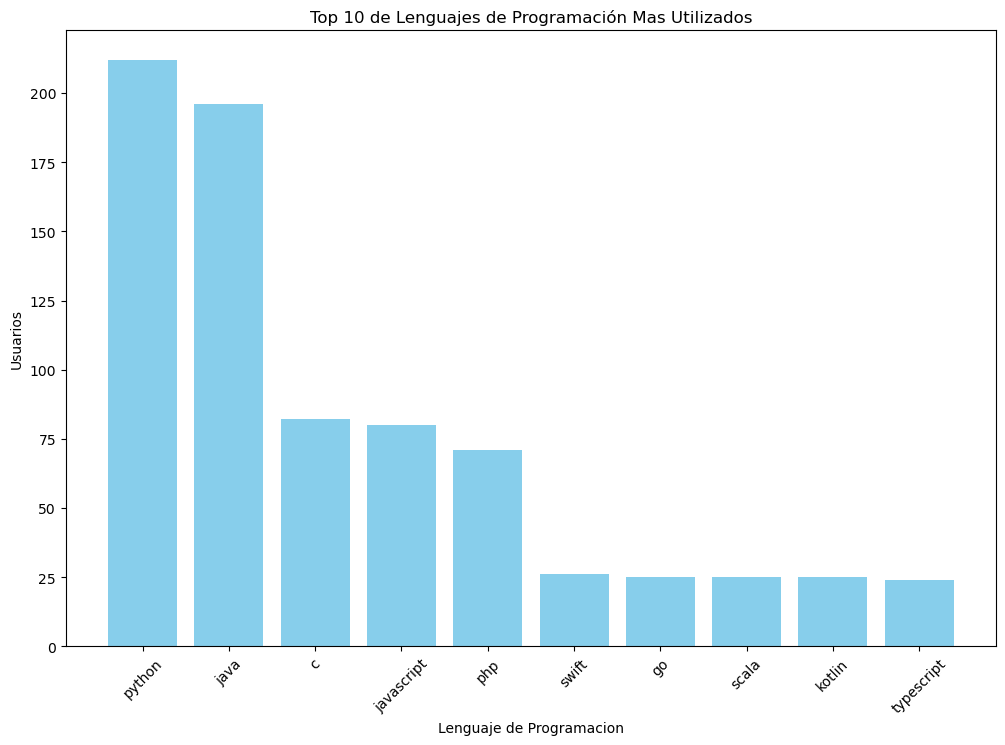

In [25]:
#Graficamos los datos
language_users_df= language_users.toPandas()

plt.figure(figsize=(12, 8))
plt.bar(language_users_df["ProgrammingLanguage"][:10], language_users_df["Users"][:10], color='skyblue')
plt.xlabel("Lenguaje de Programacion")
plt.ylabel("Usuarios")
plt.title("Top 10 de Lenguajes de Programación Mas Utilizados")
plt.xticks(rotation=45)
plt.show()

#### 2.1.1.1. Conclusiones
- Python y Java son claramente los lenguajes de programación más utilizados en los puestos de IT en Alemania en 2020. Python ocupa el primer lugar, seguido muy de cerca por Java. Esto sugiere que ambos lenguajes son escenciales para los profesionales de IT.
- También se observa el uso de lenguajes modernos como Swift, Go, Kotlin y TypeScript podria verse como una tendencia hacia la modernización y la adopción de nuevas tecnologías.

### 2.1.2. Diferencia entre promedios salariales del género masculino y femenino
En esta sección, exploraremos las diferencias en los salarios entre hombres y mujeres, enfocándonos específicamente en el nivel senior para obtener un análisis detallado de un segmento concreto. Iniciaremos con un análisis descriptivo estadístico para evaluar la forma de los datos.  Para ello, nos enfocaremos en el año mas reciente proporcionado en los datos, es decir 2020.

In [26]:
### Verificamos estructura de los salarios
salaries2020.printSchema()

root
 |-- Timestamp: string (nullable = true)
 |-- Age: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- City: string (nullable = true)
 |-- Position : string (nullable = true)
 |-- YearsExperience: string (nullable = true)
 |-- ExperienceGermany: string (nullable = true)
 |-- SeniorityLevel: string (nullable = true)
 |-- ProgrammingLanguage: string (nullable = true)
 |-- OtherTech: string (nullable = true)
 |-- SalaryYear: string (nullable = true)
 |-- BonusYear: string (nullable = true)
 |-- AnnualSalary: string (nullable = true)
 |-- AnnualBonus: string (nullable = true)
 |-- VacationDays: string (nullable = true)
 |-- EmploymentStatus: string (nullable = true)
 |-- СontractDuration: string (nullable = true)
 |-- MainLanguage: string (nullable = true)
 |-- CompanySize: string (nullable = true)
 |-- CompanyType: string (nullable = true)
 |-- LostJobCoronavirus: string (nullable = true)
 |-- ShorterWorkingWeek: string (nullable = true)
 |-- PayWorkHome: string (null

In [27]:
#Verificamos numero de filas en el archivo
salaries2020.count()

1253

In [28]:
# Usaremos las columnas de Gender para filtrar entre hombres y mujeres, YearSalary como medicion del salario y Seniority level para filtrar por experiencia
#Eliminamos aquellos registros vacios en las columnas de interes
# Eliminar los registros con valores nulos en las columnas de interés
salaries2020_clean = salaries2020.filter(
    col('Gender').isNotNull() &
    col('SalaryYear').isNotNull() &
    col('SeniorityLevel').isNotNull()
)

# Mostrar los primeros registros para verificar
salaries2020_clean.show(truncate=True, vertical=True)

-RECORD 0-----------------------------------
 Timestamp           | 24/11/2020 11:14:15  
 Age                 | 26                   
 Gender              | Male                 
 City                | Munich               
 Position            | Software Engineer    
 YearsExperience     | 5                    
 ExperienceGermany   | 3                    
 SeniorityLevel      | Senior               
 ProgrammingLanguage | TypeScript           
 OtherTech           | Kotlin, Javascrip... 
 SalaryYear          | 80000                
 BonusYear           | 5000                 
 AnnualSalary        | 75000                
 AnnualBonus         | 10000                
 VacationDays        | 30                   
 EmploymentStatus    | Full-time employee   
 СontractDuration    | Unlimited contract   
 MainLanguage        | English              
 CompanySize         | 51-100               
 CompanyType         | Product              
 LostJobCoronavirus  | No                   
 ShorterWo

In [29]:
#Verificamos numero de filas en el dataframe despues de limpieza
salaries2020_clean.count()

1235

In [30]:
#Exploramos los diferentes valores de Seniority level
salaries2020_clean.dropDuplicates(['SeniorityLevel']).select('SeniorityLevel').show(truncate=False, vertical = True)

-RECORD 0---------------------------------------------------
 SeniorityLevel | Senior                                    
-RECORD 1---------------------------------------------------
 SeniorityLevel | VP                                        
-RECORD 2---------------------------------------------------
 SeniorityLevel | Student                                   
-RECORD 3---------------------------------------------------
 SeniorityLevel | CTO                                       
-RECORD 4---------------------------------------------------
 SeniorityLevel | Principal                                 
-RECORD 5---------------------------------------------------
 SeniorityLevel | Director                                  
-RECORD 6---------------------------------------------------
 SeniorityLevel | intern                                    
-RECORD 7---------------------------------------------------
 SeniorityLevel | No level                                  
-RECORD 8---------------

In [31]:
#Filtramos solo los registros en nivel senior usando SQL
# Registrar el DataFrame como una vista temporal
salaries2020_clean.createOrReplaceTempView("salaries2020_clean")
salaries2020_senior = spark.sql("""
    SELECT * FROM salaries2020_clean WHERE SeniorityLevel = 'Senior'
""")
salaries2020_senior.count()

562

In [32]:
salaries2020_senior.printSchema()

root
 |-- Timestamp: string (nullable = true)
 |-- Age: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- City: string (nullable = true)
 |-- Position : string (nullable = true)
 |-- YearsExperience: string (nullable = true)
 |-- ExperienceGermany: string (nullable = true)
 |-- SeniorityLevel: string (nullable = true)
 |-- ProgrammingLanguage: string (nullable = true)
 |-- OtherTech: string (nullable = true)
 |-- SalaryYear: string (nullable = true)
 |-- BonusYear: string (nullable = true)
 |-- AnnualSalary: string (nullable = true)
 |-- AnnualBonus: string (nullable = true)
 |-- VacationDays: string (nullable = true)
 |-- EmploymentStatus: string (nullable = true)
 |-- СontractDuration: string (nullable = true)
 |-- MainLanguage: string (nullable = true)
 |-- CompanySize: string (nullable = true)
 |-- CompanyType: string (nullable = true)
 |-- LostJobCoronavirus: string (nullable = true)
 |-- ShorterWorkingWeek: string (nullable = true)
 |-- PayWorkHome: string (null

In [33]:
#Analizamos los datos
salaries2020_senior = salaries2020_senior.withColumn("SalaryYear", col("SalaryYear").cast("double"))
stats_salaries = salaries2020_senior.select(
    f.count("SalaryYear").alias("count"),
    f.mean("SalaryYear").alias("mean"),
    f.stddev("SalaryYear").alias("stddev"),
    f.min("SalaryYear").alias("min"),
    f.max("SalaryYear").alias("max")
)
stats_salaries.show()

+-----+-----------------+-----------------+-------+--------+
|count|             mean|           stddev|    min|     max|
+-----+-----------------+-----------------+-------+--------+
|  562|75456.41459074733|37282.63900638703|26400.0|850000.0|
+-----+-----------------+-----------------+-------+--------+




La tabla a continuación muestra un análisis descriptivo de los salarios anuales (YearSalary) para profesionales en nivel senior en Alemania. Los datos proporcionan una visión general de la distribución salarial en este segmento:

| Count |           Mean |         Stddev |    Min |     Max |
|-------|-----------------|-----------------|--------|---------|
|   562 | 75456.41459074733 | 37282.63900638703 | 26400.0 | 850000.0 |

- **Count**: Representa el número total de registros de salarios en el nivel senior, que en este caso es 562.

- **Mean**: El salario promedio anual es de 75,456.41 EUR.

- **Stddev**: La desviación estándar es de 37,282.64 EUR, lo que indica una variabilidad considerable en los salarios.

- **Min**: El salario más bajo registrado es de 26,400 EUR.

- **Max**: El salario más alto registrado es de 850,000 EUR.



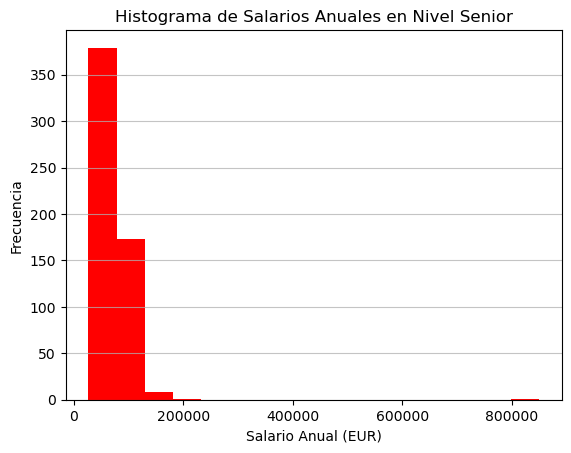

In [34]:
#Mostramos los datos en un histograma
from pyspark_dist_explore import hist

fig, ax = plt.subplots()
hist(ax, salaries2020_senior.select('SalaryYear'), bins=16, color=['red'])
plt.title("Histograma de Salarios Anuales en Nivel Senior")
plt.xlabel("Salario Anual (EUR)")
plt.ylabel("Frecuencia")
plt.grid(axis='y', alpha=0.75)

In [35]:
#Ya que hay algunos outliers, procederemos a filtrar los datos usando como regla los cuartiles, para descartar todos los datos menores de Q1 y mayores a Q3
quartiles = salaries2020_senior.approxQuantile("SalaryYear", [0.25, 0.75], 0.01)
q1 = quartiles[0]
q3 = quartiles[1]
iqr = q3 - q1
salaries2020_senior_clean = salaries2020_senior.filter((col("SalaryYear") >= (q1 - 1.5 * iqr)) & (col("SalaryYear") <= (q3 + 1.5 * iqr)))
salaries2020_senior_clean.count()

523

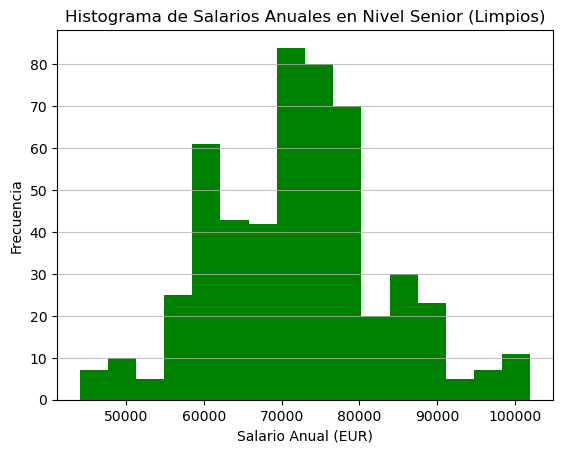

In [36]:
#Mostramos los datos en un histograma
from pyspark_dist_explore import hist
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
hist(ax, salaries2020_senior_clean.select('SalaryYear'), bins=16, color=['green'])
plt.title("Histograma de Salarios Anuales en Nivel Senior (Limpios)")
plt.xlabel("Salario Anual (EUR)")
plt.ylabel("Frecuencia")
plt.grid(axis='y', alpha=0.75)

In [37]:
#Procedemos a comparar los estadisticas entre hombres y mujeres
#Primero sacamos el analisis descriptivo entre generos
stats_gender = salaries2020_senior_clean.groupBy("Gender").agg(
    f.count("SalaryYear").alias("count"),
    f.mean("SalaryYear").alias("mean"),
    f.stddev("SalaryYear").alias("stddev"),
    f.min("SalaryYear").alias("min"),
    f.max("SalaryYear").alias("max")
)
stats_gender.show()

+------+-----+-----------------+------------------+-------+--------+
|Gender|count|             mean|            stddev|    min|     max|
+------+-----+-----------------+------------------+-------+--------+
|Female|   56|66751.78571428571|11089.929765683468|45000.0| 88000.0|
|  Male|  467|72751.67665952891| 10847.37206522423|44000.0|102000.0|
+------+-----+-----------------+------------------+-------+--------+



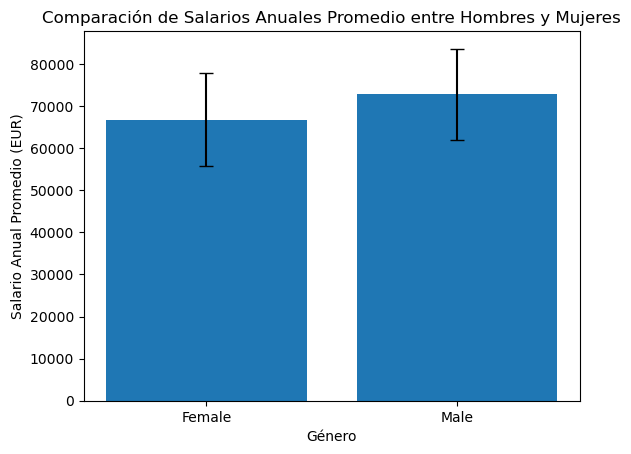

In [38]:
#Graficamos los datos
import pandas as pd
gender_data = stats_gender.select("Gender", "mean", "stddev").collect()


df = pd.DataFrame(gender_data, columns=["Gender", "mean", "stddev"])

# Plotting
plt.bar(df['Gender'], df['mean'], yerr=df['stddev'], capsize=5)
plt.xlabel("Género")
plt.ylabel("Salario Anual Promedio (EUR)")
plt.title("Comparación de Salarios Anuales Promedio entre Hombres y Mujeres")
plt.show()

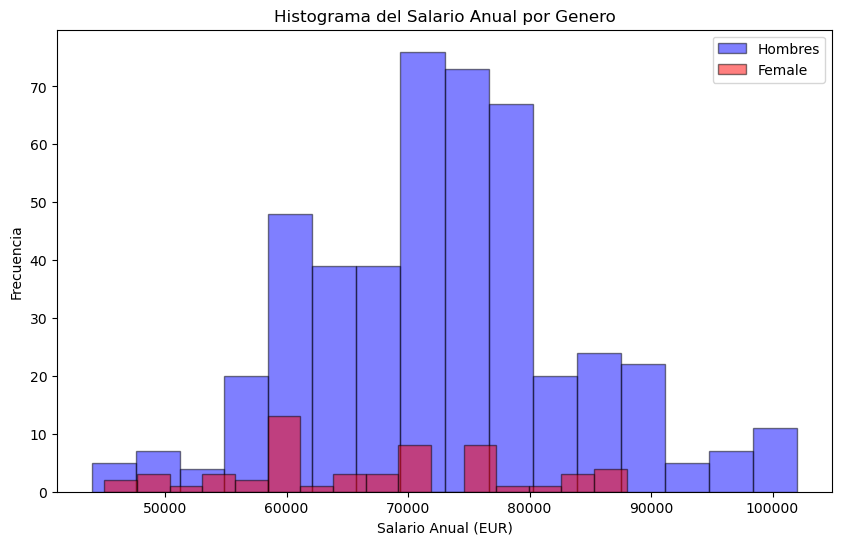

In [39]:
#Graficamos en histogramas separados
male_salaries = salaries2020_senior_clean.filter(col("Gender") == "Male").select("SalaryYear").toPandas()
female_salaries = salaries2020_senior_clean.filter(col("Gender") == "Female").select("SalaryYear").toPandas()

plt.figure(figsize=(10, 6))

plt.hist(male_salaries["SalaryYear"], bins=16, alpha=0.5, label="Hombres", color='blue', edgecolor='black')
plt.hist(female_salaries["SalaryYear"], bins=16, alpha=0.5, label="Female", color='red', edgecolor='black')

plt.title("Histograma del Salario Anual por Genero")
plt.xlabel("Salario Anual (EUR)")
plt.ylabel("Frecuencia")

plt.legend()

plt.show()

### 2.2.1. Conclusiones
- **Brecha Salarial de Género:** Los resultados muestran una brecha salarial de género en el nivel senior en Alemania, con los hombres ganando en promedio más que las mujeres. Esta diferencia puede estar influenciada por varios factores como pueden ser el rol específico, la experiencia y las habilidades adicionales.

- **Variabilidad Salarial:** La similitud en la desviación estándar entre los géneros sugiere que la dispersión de los salarios es comparable, pero la diferencia en los salarios máximos sugiere posibles desigualdades en el acceso a los puestos mejor remunerados.
- **Poca cantidad de datos**: La cantidad de registros (56 para mujeres frente a 467 para hombres) puede sugerir que las carreras relacionadas con IT no atraen tanto a las mujeres, o que hay menos mujeres en niveles senior. Sin embargo, considerando que estos datos son del 2020 y que para alcanzar el nivel senior se requieren varios años de experiencia, es probable que en la actualidad haya más mujeres en este campo. Sería valioso realizar análisis adicionales comparando los datos de diferentes años para identificar posibles tendencias de aumento en la representación femenina en niveles senior.

## 2.3. Diferencias salariales entre diferentes niveles de antigüedad
En esta sección, analizamos las diferencias salariales entre los puestos junior y senior, entre otros, dentro del sector de IT en Alemania en 2020. Esta comparación es crucial para entender cómo la experiencia y el nivel influyen en la compensación económica de los profesionales de IT.

In [40]:
#Reusamos la varible salaries2020_clean
salaries2020_clean.show(truncate=True, vertical=True)

-RECORD 0-----------------------------------
 Timestamp           | 24/11/2020 11:14:15  
 Age                 | 26                   
 Gender              | Male                 
 City                | Munich               
 Position            | Software Engineer    
 YearsExperience     | 5                    
 ExperienceGermany   | 3                    
 SeniorityLevel      | Senior               
 ProgrammingLanguage | TypeScript           
 OtherTech           | Kotlin, Javascrip... 
 SalaryYear          | 80000                
 BonusYear           | 5000                 
 AnnualSalary        | 75000                
 AnnualBonus         | 10000                
 VacationDays        | 30                   
 EmploymentStatus    | Full-time employee   
 СontractDuration    | Unlimited contract   
 MainLanguage        | English              
 CompanySize         | 51-100               
 CompanyType         | Product              
 LostJobCoronavirus  | No                   
 ShorterWo

In [41]:
salaries2020_clean = salaries2020_clean.withColumn("SalaryYear", col("SalaryYear").cast("double"))

level_stats = salaries2020_clean.groupBy("SeniorityLevel").agg(
    f.count("SalaryYear").alias("count"),
    f.mean("SalaryYear").alias("mean"),
    f.stddev("SalaryYear").alias("stddev"),
    f.min("SalaryYear").alias("min"),
    f.max("SalaryYear").alias("max")
)


level_stats_clean = level_stats.filter(
    col('count').isNotNull() &
    col('mean').isNotNull() &
    col('stddev').isNotNull() &
    col('min').isNotNull() &
    col('max').isNotNull() &
    (col('SeniorityLevel') != 'Middle')
)
level_stats_clean.show()


+--------------+-----+------------------+------------------+-------+--------+
|SeniorityLevel|count|              mean|            stddev|    min|     max|
+--------------+-----+------------------+------------------+-------+--------+
|        Senior|  562| 75456.41459074733| 37282.63900638703|26400.0|850000.0|
|     Principal|    3|           95000.0| 16093.47693943108|77000.0|108000.0|
|          Head|   44|100761.36363636363| 30278.45358643046|50000.0|200000.0|
|          Lead|  165|  88714.9696969697| 25641.41799150214|20000.0|250000.0|
|        Junior|   79|49980.556962025315|31273.087272977245|10164.0|300000.0|
+--------------+-----+------------------+------------------+-------+--------+



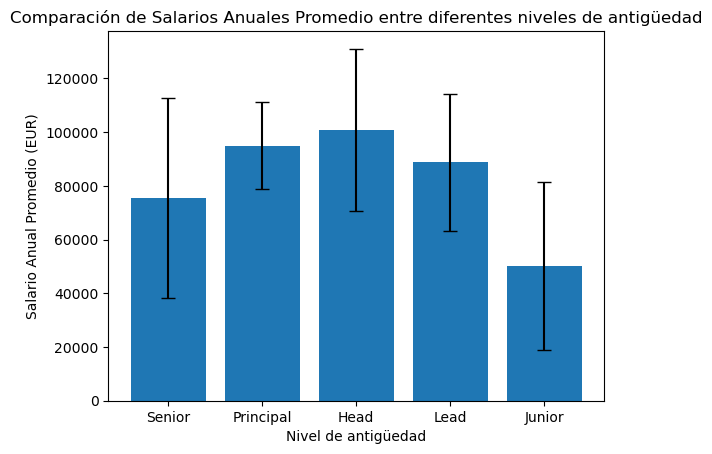

In [42]:
level_data = level_stats_clean.select("SeniorityLevel", "mean", "stddev").toPandas()

# Plotting
plt.bar(level_data['SeniorityLevel'], level_data['mean'], yerr=level_data['stddev'], capsize=5)
plt.xlabel("Nivel de antigüedad")
plt.ylabel("Salario Anual Promedio (EUR)")
plt.title("Comparación de Salarios Anuales Promedio entre diferentes niveles de antigüedad")
plt.show()

### 2.3.1. Conclusiones
- La desviación estándar (indicada por las barras de error) es considerable en todos los niveles, lo que sugiere una alta variabilidad salarial dentro de cada nivel de antigüedad.
- Los niveles "Principal" y "Head" muestran una mayor variabilidad en comparación con los otros niveles, lo que puede reflejar una gama más amplia de roles y responsabilidades dentro de estos niveles.
- Aunque el nivel "Senior" tiene un salario promedio menor en comparación con "Principal" y "Head", la variabilidad salarial en "Senior" es alta, indicando que algunos profesionales pueden ganar significativamente más o menos que el promedio.
- El nivel "Junior", con el salario promedio más bajo, también muestra una alta variabilidad, sugiriendo que hay oportunidades para que algunos profesionales en este nivel ganen salarios por encima del promedio.